In [109]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
import re

from pathlib import Path

%matplotlib inline

In [110]:
RESULTS_DIR_PATH = Path("/nfs/homedirs/grafberg/pycharm_project4/graph/results/")
RESULTS_DATE_FOLDER = Path("2019-07-09_16-24-05")
METRICS = ['test_auc', 'test_ap', 'naive_precision',
           'naive_recall', 'lsh_precision',
           'lsh_recall', 'compare_precision', 'compare_recall']

In [111]:
def parse_filename(filename: str):
    """
    Extracts Results Meta-Information from filename
    """
    # Check if is indeed pickle file
    assert filename.endswith('.pkl')
    filename = filename[:-4] # Remove .pkl
    
    # Retrieve individual attributes
    attributes = filename.split("_")[1:] # Split and remove 'GS'
    assert len(attributes) == 4 
    
    params = {
        'dataset': attributes[0],
        'dist_metric': attributes[1],
        'bands': int(attributes[2]),
        'rows': int(attributes[3])
    }
    
    return params
    

def extract_experiment_results(path: Path):
    """
    path: Folder containing individual .pkl files with experiment results
    
    """
    experiments = []
    
    for file in path.glob('*.pkl'):
        meta_inf = parse_filename(file.parts[-1])
        with file.open('rb') as f:     
            results = pk.load(file.open('rb'))
            
            for metric in METRICS:
                try:
                    meta_inf[metric] = results[metric]  
                except KeyError as e:
                    print(f"Metric {metric} not found in saved results from experiment {file.parts[-1]}")
        
        experiments.append(meta_inf)
    
    cols = ['dataset', 'bands', 'rows'] + [m for m in METRICS if m in results]
    return pd.DataFrame(experiments)[cols]

In [112]:
df = extract_experiment_results(RESULTS_DIR_PATH / RESULTS_DATE_FOLDER)
df.to_csv(RESULTS_DIR_PATH / RESULTS_DATE_FOLDER / 'results.csv') # Save df to csv file

In [113]:
df

,dataset,bands,rows,test_auc,test_ap,naive_precision,naive_recall,lsh_precision,lsh_recall,compare_precision,compare_recall
0,Cora,8,128,0.950164,0.940516,0.191880,0.353266,0.507049,0.103113,1.000000,1.000000
1,Cora,2,64,0.954247,0.949719,0.193768,0.337497,0.296627,0.122466,1.000000,1.000000
2,Cora,16,32,0.965564,0.966637,0.183319,0.350195,0.215132,0.349375,1.000000,1.000000
3,Cora,8,32,0.966521,0.962887,0.189669,0.350399,0.226533,0.342003,1.000000,1.000000
4,Cora,2,16,0.945378,0.944899,0.203357,0.344870,0.258741,0.295515,1.000000,1.000000
5,Cora,2,128,0.918705,0.917970,0.195061,0.374462,0.497483,0.060721,1.000000,1.000000
6,Cora,4,16,0.960148,0.958436,0.188794,0.349171,0.228105,0.339238,0.999862,0.999862
7,Cora,4,128,0.942556,0.928976,0.189617,0.355314,0.554628,0.074852,1.000000,1.000000
8,Cora,2,32,0.948482,0.946715,0.188788,0.358284,0.270652,0.235511,1.000000,1.000000
9,Cora,4,32,0.948579,0.941382,0.187418,0.350195,0.239259,0.298792,1.000000,1.000000


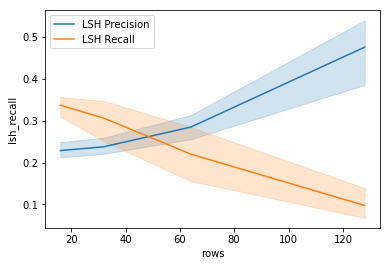

In [114]:
# Plot influence of number of rows in signature matrix on performance
sns.lineplot(x='rows', y='lsh_precision', data=df, label='LSH Precision')
sns.lineplot(x='rows', y='lsh_recall', data=df, label='LSH Recall')
plt.legend()

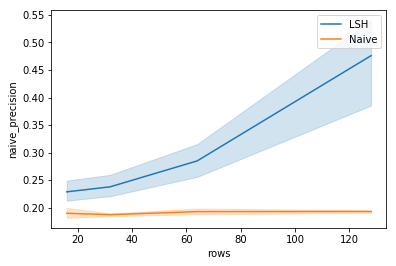

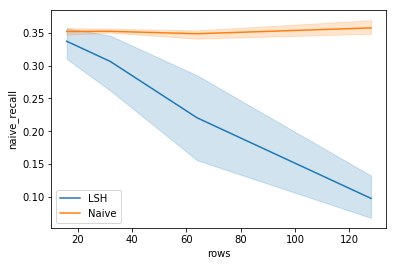

In [115]:
# Compare Precision of LSH vs Naive
sns.lineplot(x='rows', y='lsh_precision', data=df, label='LSH')
sns.lineplot(x='rows', y='naive_precision', data=df, label='Naive')
plt.figure()
sns.lineplot(x='rows', y='lsh_recall', data=df, label='LSH')
sns.lineplot(x='rows', y='naive_recall', data=df, label='Naive')

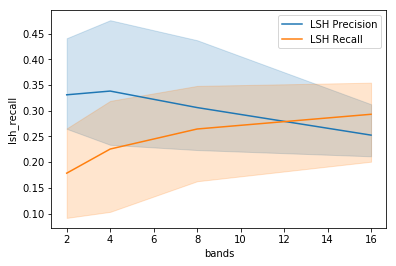

In [116]:
# Same for number of bands 
sns.lineplot(x='bands', y='lsh_precision', data=df, label='LSH Precision')
sns.lineplot(x='bands', y='lsh_recall', data=df, label='LSH Recall')
plt.legend()

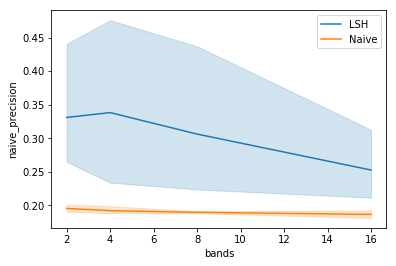

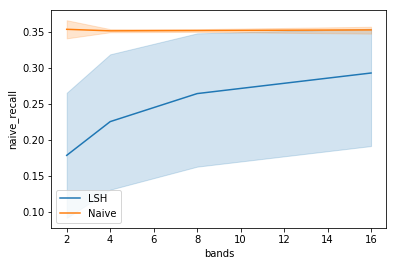

In [117]:
# Compare Precision of LSH vs Naive
sns.lineplot(x='bands', y='lsh_precision', data=df, label='LSH')
sns.lineplot(x='bands', y='naive_precision', data=df, label='Naive')
plt.figure()
sns.lineplot(x='bands', y='lsh_recall', data=df, label='LSH')
sns.lineplot(x='bands', y='naive_recall', data=df, label='Naive')

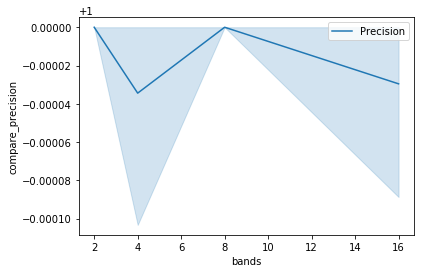

In [120]:
# Plot influence of number of rows on precision/ recall of naive matrix
sns.lineplot(x='bands', y='compare_precision', data=df, label='Precision')
#sns.lineplot(x='bands', y='compare_recall', data=df, label='Recall')
plt.legend()

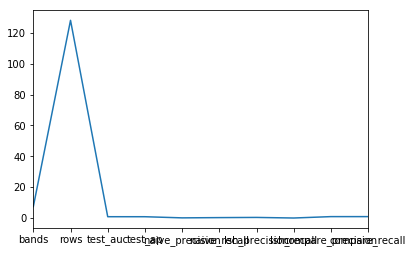

In [119]:
df[df['rows'] == 128].mean().plot(x='rows', y='lsh_recall')